<a href="https://colab.research.google.com/github/Finyasy/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]
tokenizer=Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [ ]:
sequences=tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [ ]:
padded=pad_sequences(sequences,maxlen=7)
print("\nWord Index=",word_index)
print("\nSequences=",sequences)
print("\nPadded Sequences:")
print(padded)


Word Index= {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences= [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [ ]:
test_data=[
           'i really love my dog',
           'My dog love meat'
]
test_seq=tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence:",test_seq)


Test Sequence: [[5, 1, 3, 2, 4], [2, 4, 3, 1]]


In [ ]:
padded=pad_sequences(test_seq,maxlen=10)
print("\nPadded Sequence:",padded)


Padded Sequence: [[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 0 2 4 3 1]]


In [ ]:
padded=pad_sequences(test_seq,padding='post',maxlen=10)
print("\nPadded Sequence:",padded)


Padded Sequence: [[5 1 3 2 4 0 0 0 0 0]
 [2 4 3 1 0 0 0 0 0 0]]


In [ ]:
padded=pad_sequences(test_seq,padding='pre',truncating='post',maxlen=10)
print("\nPadded Sequence:",padded)


Padded Sequence: [[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 0 2 4 3 1]]


In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size=1000
embedding_dim=16
max_length=100
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
training_size=2000

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-12-26 14:51:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-12-26 14:51:52 (105 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json",mode='r') as f:
  datastore=json.load(f)

sentences=[]
labels=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [ ]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [ ]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [ ]:
import numpy as np
training_padded=np.array(training_padded)
training_labels=np.array(training_labels)
testing_padded=np.array(testing_padded)
testing_labels=np.array(testing_labels)

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(24,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs=30
history=model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)

Epoch 1/30
63/63 - 2s - loss: 0.6876 - accuracy: 0.5580 - val_loss: 0.6852 - val_accuracy: 0.5613
Epoch 2/30
63/63 - 1s - loss: 0.6857 - accuracy: 0.5580 - val_loss: 0.6842 - val_accuracy: 0.5613
Epoch 3/30
63/63 - 1s - loss: 0.6843 - accuracy: 0.5580 - val_loss: 0.6831 - val_accuracy: 0.5613
Epoch 4/30
63/63 - 1s - loss: 0.6828 - accuracy: 0.5580 - val_loss: 0.6815 - val_accuracy: 0.5613
Epoch 5/30
63/63 - 1s - loss: 0.6807 - accuracy: 0.5580 - val_loss: 0.6792 - val_accuracy: 0.5613
Epoch 6/30
63/63 - 1s - loss: 0.6768 - accuracy: 0.5580 - val_loss: 0.6751 - val_accuracy: 0.5613
Epoch 7/30
63/63 - 1s - loss: 0.6702 - accuracy: 0.5580 - val_loss: 0.6676 - val_accuracy: 0.5613
Epoch 8/30
63/63 - 1s - loss: 0.6578 - accuracy: 0.5635 - val_loss: 0.6528 - val_accuracy: 0.5934
Epoch 9/30
63/63 - 1s - loss: 0.6340 - accuracy: 0.6255 - val_loss: 0.6281 - val_accuracy: 0.6794
Epoch 10/30
63/63 - 1s - loss: 0.5985 - accuracy: 0.7105 - val_loss: 0.5947 - val_accuracy: 0.7298
Epoch 11/30
63/63 -

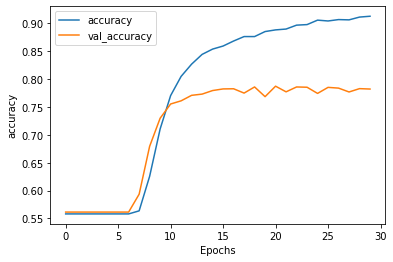

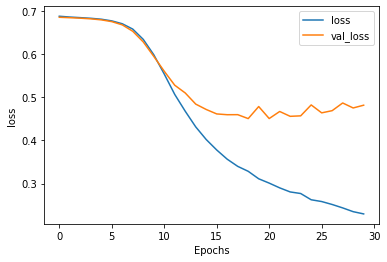

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) #shape:(vocab_size,embeddibg_dim)

(1000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  #files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["I'm feeling sick", "Happy merry christmas"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.10779762]
 [0.13564289]]


In [6]:
# Load the TensorBoard notebook ex
\tensorboard --logdir logs/hparam_tuning

SyntaxError: ignored